In [13]:
import sys
sys.path.append('/Users/ikumakiyoshi/Library/Mobile Documents/com~apple~CloudDocs/study_fg_rm/program/Deltamap_test/Python_delta_map/function')

import fg_make_file as fg
import cmb_make_file as cmb
import noise_make as ns
import Delta_map_with_noise as dm
import numpy as np
import healpy as hp
import warnings
warnings.filterwarnings("ignore")

In [14]:
random_seed_cmb = 5123
seed_syn = 12345
nside = 2**2

r =0.01

cmb_map_in = cmb.cmb_make_file(nside, r, random_seed_cmb, seed_syn)

### noise_map作成

In [15]:
# (ex) nosie make

freq = 337
noise_seed = [1, 2, 3]

noise_map = ns.noise_calc(freq, nside, noise_seed)
#hp.mollview(noise_map[0], title=" map", unit = "μK");

In [25]:
# noise func test
freq_band = [40, 50, 60, 68, 78, 100, 140]
freq_band_1 = [40, 50, 140]
noise_seed_array = [[1, 2, 3] , [4, 5, 6] , [7, 8, 9], [10, 11, 12] , [13, 14, 15], [16, 17, 18] , [19, 20, 21]]
noise_seed_array_1 = [[1, 2, 3] , [4, 5, 6] , [7, 8, 9]]
# rtuern 0: noise_map [I, Q, U] 角周波数 1: noiseの分散
noise_map_array = ns.noise_map_make(freq_band, nside, noise_seed_array)
noise_map_array_1 = ns.noise_map_make(freq_band_1, nside, noise_seed_array_1)
#A[0][1]

### data m　作成

In [26]:
# which_model = "s1", "d1", or "s1 and d1"
data_m = dm.make_data_m(cmb_map_in, noise_map_array, freq_band, "s1", nside)
data_m_1 = dm.make_data_m(cmb_map_in, noise_map_array_1, freq_band_1, "s1", nside)

In [18]:
#Input_map = dm.make_input_map(cmb_r_0, f_elements, "s1", nside)

In [19]:
#Input_map_40 = Input_map[0]

#hp.mollview(Input_map_40[1], title=" map", unit = "μK")

### D matrix　計算

In [27]:
beta_s = -3.

freq_bs, freq_bd, beta_d, T_d = 23*10**9, 353*10**9, 1.5, 20.1

D = dm.calc_D_matrix_param(freq_band , "s1", nside, freq_bs, beta_s, freq_bd, beta_d, T_d)
D_1 = dm.calc_D_matrix_param(freq_band_1 , "s1", nside, freq_bs, beta_s, freq_bd, beta_d, T_d)

### クリーンマップ計算

In [29]:
CMB_map_Q = dm.calc_clean_map(freq_band, noise_seed_array, data_m, D, nside)[0]
CMB_map_U = dm.calc_clean_map(freq_band, noise_seed_array, data_m, D, nside)[1]

CMB_map_Q_1 = dm.calc_clean_map(freq_band_1, noise_seed_array_1, data_m_1, D_1, nside)[0]
CMB_map_U_1 = dm.calc_clean_map(freq_band_1, noise_seed_array_1, data_m_1, D_1, nside)[1]

### パワースペクトル計算

In [30]:
Clean_map_cl = dm.calc_spectrum(cmb_map_in[1], cmb_map_in[2], CMB_map_Q, CMB_map_U, nside)[0]
Clean_map_dl = dm.calc_spectrum(cmb_map_in[1], cmb_map_in[2], CMB_map_Q, CMB_map_U, nside)[1]
Input_map_cl = dm.calc_spectrum(cmb_map_in[1], cmb_map_in[2], CMB_map_Q, CMB_map_U, nside)[2]
Input_map_dl = dm.calc_spectrum(cmb_map_in[1], cmb_map_in[2], CMB_map_Q, CMB_map_U, nside)[3]

Clean_map_cl_1 = dm.calc_spectrum(cmb_map_in[1], cmb_map_in[2], CMB_map_Q_1, CMB_map_U_1, nside)[0]
Clean_map_dl_1 = dm.calc_spectrum(cmb_map_in[1], cmb_map_in[2], CMB_map_Q_1, CMB_map_U_1, nside)[1]
Input_map_cl_1 = dm.calc_spectrum(cmb_map_in[1], cmb_map_in[2], CMB_map_Q_1, CMB_map_U_1, nside)[2]
Input_map_dl_1 = dm.calc_spectrum(cmb_map_in[1], cmb_map_in[2], CMB_map_Q_1, CMB_map_U_1, nside)[3]

l = dm.calc_spectrum(cmb_map_in[1], cmb_map_in[2], CMB_map_Q, CMB_map_U, nside)[4]

### 差分パワースペクトル計算

In [31]:
res_map_cl = dm.diff_calc_spectrum(cmb_map_in[1], cmb_map_in[2], CMB_map_Q, CMB_map_U, nside)[0]
res_map_dl = dm.diff_calc_spectrum(cmb_map_in[1], cmb_map_in[2], CMB_map_Q, CMB_map_U, nside)[0]

res_map_cl_1 = dm.diff_calc_spectrum(cmb_map_in[1], cmb_map_in[2], CMB_map_Q_1, CMB_map_U_1, nside)[0]
res_map_dl_1 = dm.diff_calc_spectrum(cmb_map_in[1], cmb_map_in[2], CMB_map_Q_1, CMB_map_U_1, nside)[0]

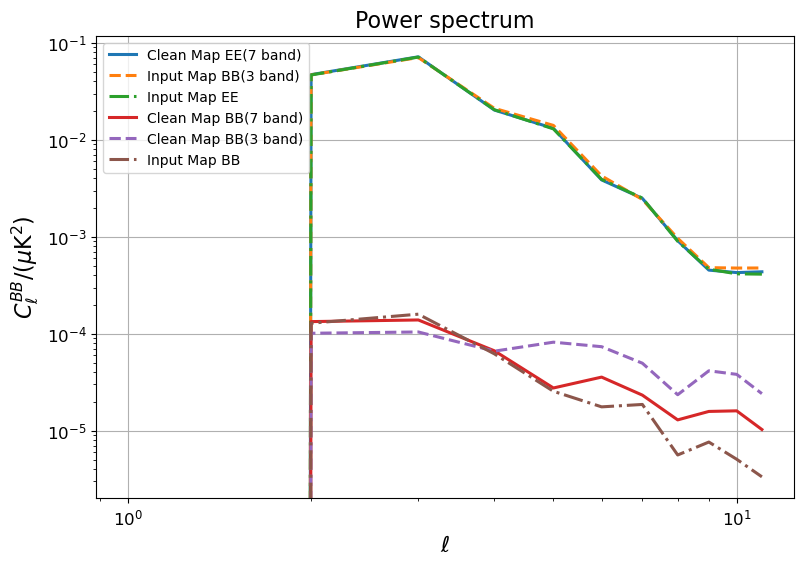

In [34]:
import matplotlib.pyplot as plt

#plot#
fig = plt.figure(figsize=(9, 6))

plt.loglog(l, Clean_map_cl[1] , lw = 2.2, label="Clean Map EE(7 band)")
plt.loglog(l, Clean_map_cl_1[1], lw = 2.2, linestyle='dashed', label="Input Map BB(3 band)")
plt.loglog(l, Input_map_cl[1], lw=2.2, linestyle='-.', label="Input Map EE")

plt.loglog(l, Clean_map_cl[2], lw = 2.2, label="Clean Map BB(7 band)")
plt.loglog(l, Clean_map_cl_1[2], lw = 2.2, linestyle='dashed', label="Clean Map BB(3 band)")
plt.loglog(l, Input_map_cl[2], lw = 2.2, linestyle='-.', label="Input Map BB")


plt.ylabel(r'$C_\ell^{BB}/ (\mu{\rm K}^2)$', fontsize=16)
plt.xlabel(r'$\ell$', fontsize=16)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.title("Power spectrum", fontsize=16)

plt.grid()
plt.legend()

plt.show()